In [129]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC


In [94]:
data=load_breast_cancer()
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [96]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [134]:
x=df.drop("target",axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
model1=LogisticRegression()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9298245614035088

In [138]:
model2=SVC(C=2.0,kernel='linear')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.935672514619883

In [142]:
from sklearn.ensemble import BaggingClassifier
model3=BaggingClassifier(clf1,n_estimators=10,max_samples=.5, max_features=.5)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9473684210526315

In [128]:
model4 = RandomForestClassifier(n_estimators=20)
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9532163742690059

In [131]:
y_pred=model3.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

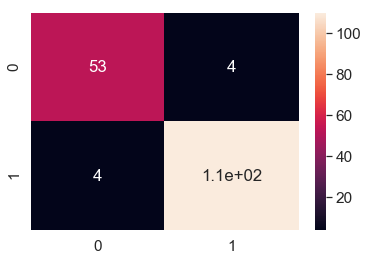

In [132]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)# font size

In [133]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9532163742690059
             precision    recall  f1-score   support

          0       0.93      0.93      0.93        57
          1       0.96      0.96      0.96       114

avg / total       0.95      0.95      0.95       171

